In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from cycler import cycler

plt.rcParams['figure.figsize'] = [10.5, 6]

custom_cycler = (cycler(color=['#C03000', '#C06000', '#C09000', "#C0C000",
                               '#90C000', '#60C000', '#30C000', '#00C000',
                               '#00C030', '#00C060', '#00C090', '#00C0C0',
                               '#0090C0', '#0060C0', '#0030C0', '#0000C0',
                               '#3000C0', '#6000C0', '#9000C0', '#C000C0',
                               '#C00090', '#C00060', '#C00030', '#C000C0']))

custom_cycler2 = (cycler(color=['#C02000', '#C04000', '#C06000', "#C08000", "#C0A000", "#C0C000",
                               '#A0C000', '#80C000', '#60C000', '#40C000', '#20C000', '#00C000',
                               '#20C000', '#40C000', '#60C000', '#80C000', '#A0C000', '#C0C000',
                               "#C0A000", "#C08000", "#C06000", "#C04000", "#C02000", "#C00000"]))

custom_cycler3 = (cycler(color=['#00C000', '#00C020', '#00C040', '#00C080', '#00C0A0', '#00C0C0',
                                '#00A0C0', '#0080C0', '#0060C0', '#0040C0', '#0020C0', '#0000C0',
                                '#0020C0', '#0040C0', '#0060C0', '#0080C0', '#00A0C0', '#00C0C0',
                                '#00C0A0', '#00C080', '#00C060', '#00C040', '#00C020',]))

custom_cycler4 = (cycler(color=[
                                '#C0C000', '#A0C000', '#80C000', '#60C000', '#40C000', '#20C000',
                                '#00C000', '#00C020', '#00C040', '#00C080', '#00C0A0', '#00C0C0',
                                '#00A0C0', '#0080C0', '#0060C0', '#0040C0', '#0020C0', '#0000C0',
                                '#0020C0', '#0040C0', '#0060C0', '#0080C0', '#00A0C0', '#00C0C0',
                                '#00C0A0', '#00C080', '#00C060', '#00C040', '#00C020', '#00C000',
                                '#20C000', '#40C000', '#60C000', '#80C000', '#A0C000',]))


custom_cycler_red = (cycler(color=['#FF0000','#EF0000','#DF0000','#CF0000','#BF0000','#AF0000','#9F0000','#8F0000',
                                   '#7F0000','#6F0000','#5F0000','#4F0000','#3F0000','#2F0000','#1F0000','#0F0000']))

custom_cycler_green = (cycler(color=['#00CF00','#00BF00','#00AF00','#009F00','#008F00',
                                     '#007F00','#006F00','#005F00','#004F00','#003F00','#002F00','#001F00','#000F00']))

custom_cycler_red_fine = (cycler(color=['#FF0000','#F80000','#EF0000','#E80000','#DF0000','#D80000','#CF0000','#C80000',
                                        '#BF0000','#B80000','#AF0000','#A80000','#9F0000','#980000','#8F0000','#880000',
                                        '#7F0000','#780000','#6F0000','#680000','#5F0000','#580000','#4F0000','#480000',
                                        '#3F0000','#380000','#2F0000','#280000','#1F0000','#180000','#0F0000','#080000']))

custom_cycler_blue = (cycler(color=['#00A0FF','#0098EF','#0090DF','#0088CF','#0080BF','#0078AF','#00709F','#00688F',
                                    '#00607F','#00586F','#00505F','#00484F','#00403F','#00382F','#00301F','#00280F',
                                    '#00200F','#00180F','#00100F','#00000F',]))

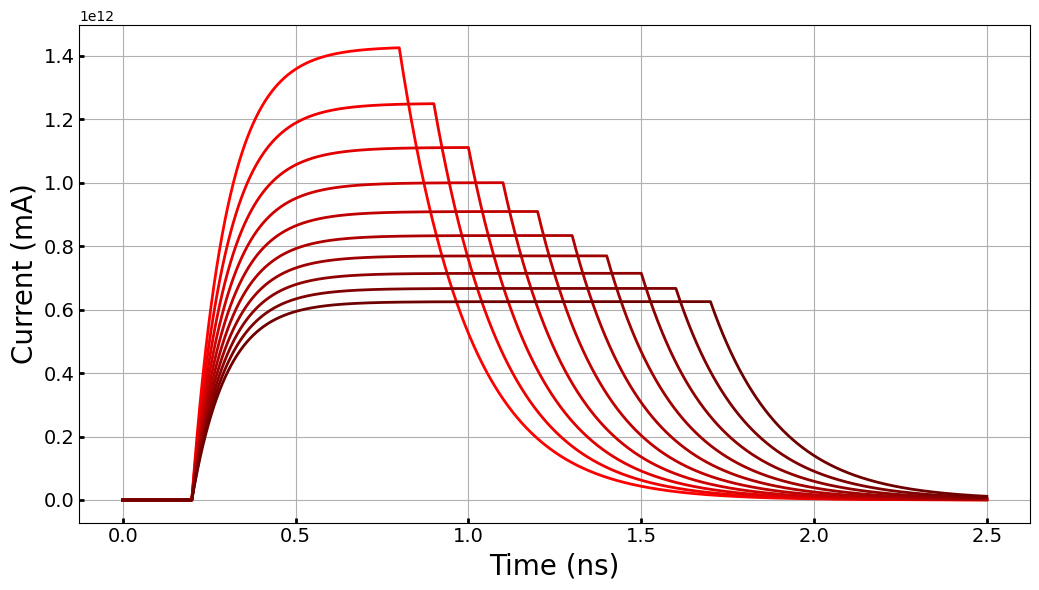

In [3]:
# create double exponential waveform

import numpy as np
import math
import matplotlib.pyplot as plt

t_r = 0.2e-9
t_f_0 = 0.8e-9
tau_r = 0.1e-9
tau_f = 0.2e-9
I_peak_0 = 2e-3
I_initial = 0

t_start = 0
t_stop = 2.5e-9
t_step = 1e-12

t_values = []
y_values = []
Qtot = 1

plt.rc('axes', prop_cycle=custom_cycler_red)

for i in range (10):
    
    #I_peak = I_peak_0 - (i * 0.2) * 1e-3
    t_f = t_f_0 + (i * 0.1) * 1e-9
    I_peak = Qtot / ((t_f - t_r) - tau_r + tau_f)
    t = t_start
    y = 0
    t_values = []
    y_values = []
    while t <= t_stop:

        if (t < t_r):
            y = I_initial
        elif(t_r <= t < t_f):
            y = I_initial + (I_peak - I_initial) * (1 - math.exp((-1 * (t - t_r)) / tau_r))
        else:
            y = I_initial + (I_peak - I_initial) * (1 - math.exp((-1 * (t - t_r)) / tau_r)) - (I_peak - I_initial) * (1 - math.exp((-1 * (t - t_f)) / tau_f))

        t_values.append(t * 1e9)
        y_values.append(y * 1000)
        t += t_step


    plt.plot(t_values, y_values, linewidth=2)

plt.xlabel('Time (ns)', fontsize=20)
plt.ylabel('Current (mA)', fontsize=20)
#plt.title('Example Double Exponential', fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tick_params(direction='in', width='2')

plt.tight_layout()
plt.savefig("EX_Double_Exponential")
plt.show()


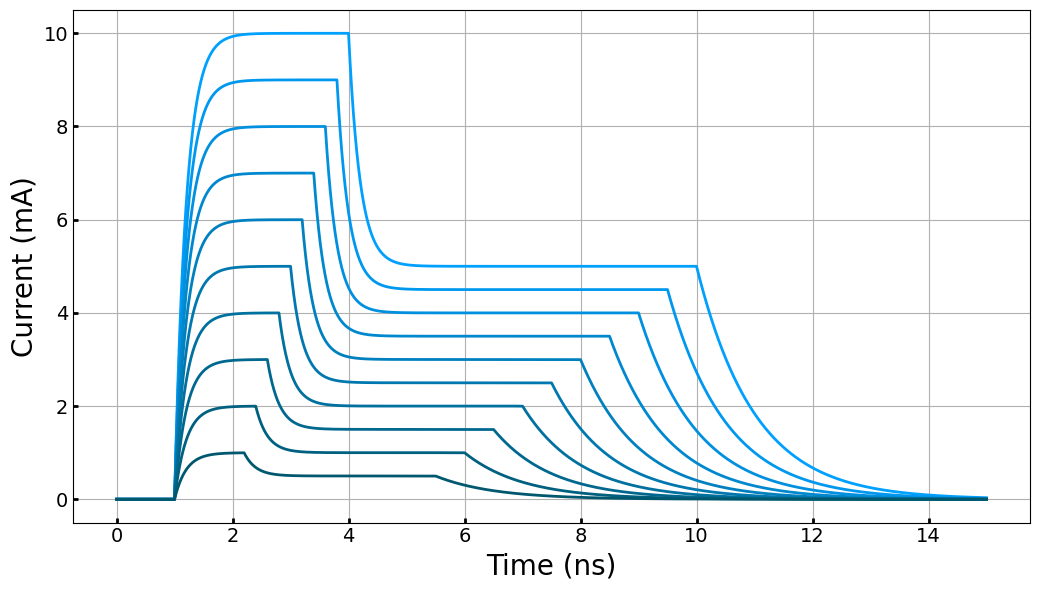

In [4]:
# create dual double exponential waveform

import numpy as np
import math
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10.5, 6]

t_r = 1e-9
t_f_0 = 10e-9
tau_r = 0.2e-9
tau_f = 1e-9
I_peak_0 = 5e-3
I_initial = 0e-3

t_r_2 = 1e-9
t_f_2_0 = 4e-9
tau_r_2 = 0.2e-9
tau_f_2 = 0.2e-9
I_peak_2_0 = 5e-3
I_initial_2 = 0

t_start = 0
t_stop = 15e-9
t_step = 1e-12

plt.rc('axes', prop_cycle=custom_cycler_blue)

for i in range (10):
    t_f = t_f_0 - (i * 0.5) * 1e-9
    t_f_2 = t_f_2_0 - (i * 0.2) * 1e-9 #t_f_2_0 + (i) * 1e-9
    I_peak = I_peak_0 - (i * 0.5) * 1e-3
    I_peak_2 = I_peak_2_0 - (i * 0.5) * 1e-3
    

    t_values = []
    y_values = []

    t_values_2 = []
    y_values_2 = []

    t = t_start
    y = 0
    while t <= t_stop:

        if (t < t_r):
            y = I_initial
        elif(t_r <= t < t_f):
            y = I_initial + (I_peak - I_initial) * (1 - math.exp((-1 * (t - t_r)) / tau_r))
        else:
            y = I_initial + (I_peak - I_initial) * (1 - math.exp((-1 * (t - t_r)) / tau_r)) - (I_peak - I_initial) * (1 - math.exp((-1 * (t - t_f)) / tau_f))

        t_values.append(t * 1e9)
        y_values.append(y * 1000)
        t += t_step

    t = t_start
    y = 0
    while t <= t_stop:

        if (t < t_r_2):
            y = I_initial_2
        elif(t_r_2 <= t < t_f_2):
            y = I_initial_2 + (I_peak_2 - I_initial_2) * (1 - math.exp((-1 * (t - t_r_2)) / tau_r_2))
        else:
            y = I_initial_2 + (I_peak_2 - I_initial_2) * (1 - math.exp((-1 * (t - t_r_2)) / tau_r_2)) - (I_peak_2 - I_initial_2) * (1 - math.exp((-1 * (t - t_f_2)) / tau_f_2))

        t_values_2.append(t * 1e9)
        y_values_2.append(y * 1000)
        t += t_step

    final_y_values = [a + b for a,b in zip(y_values, y_values_2)]

    plt.plot(t_values, final_y_values, linewidth=2)


plt.xlabel('Time (ns)', fontsize=20)
plt.ylabel('Current (mA)', fontsize=20)
#plt.title('Example Dual Double Exponential', fontsize=20)
#plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tick_params(direction='in', width='2')
plt.tight_layout()
plt.savefig("EX_Dual_Double_Exponential")
plt.show()


4.000216050205062


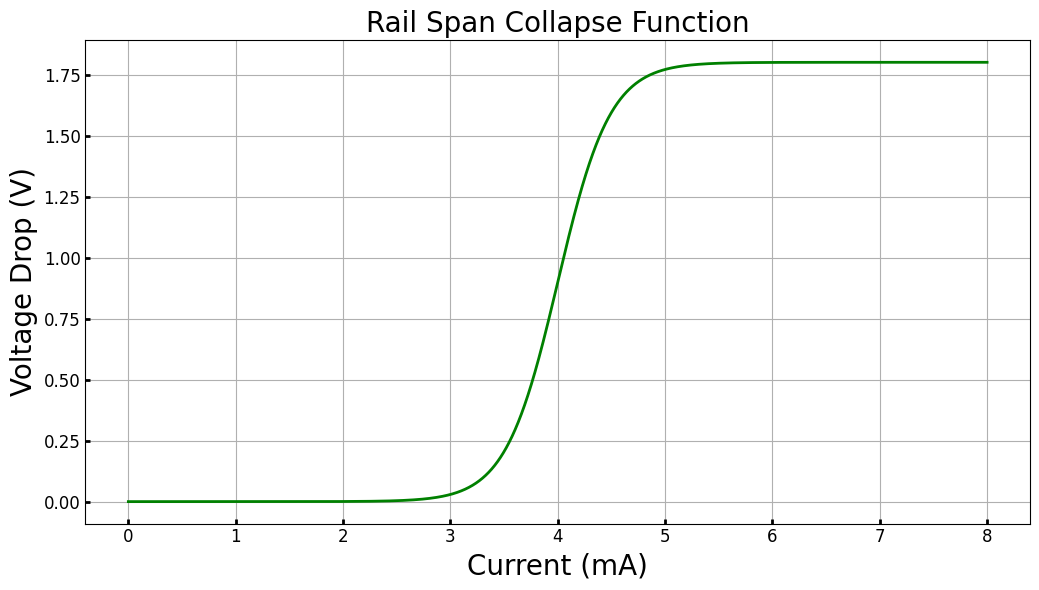

In [4]:
# rail span collapse function

import numpy as np
import math
import matplotlib.pyplot as plt

V_nominal = 1.8
k = 4.1
V_limit = 0.01
I_limit = 2.735

I_start = 0
I_stop = 8
I_step = 1e-3

I_values = []
V_values = []

I = I_start
V = 0
I_0 = I_limit - (math.log(V_limit / (V_nominal - V_limit)) / k)

print(I_0)

while I <= I_stop:
    V = V_nominal / (1 + math.exp(-k * (I - I_0)))

    I_values.append(I)
    V_values.append(V)
    I += I_step


plt.plot(I_values, V_values, color='green', linewidth=2)
plt.xlabel('Current (mA)', fontsize=20)
plt.ylabel('Voltage Drop (V)', fontsize=20)
# plt.ylim(0, 1.9)
# plt.xlim(0, 8)
plt.title('Rail Span Collapse Function', fontsize=20)
#plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tick_params(direction='in', width='2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("Rail_Collapse_Function")
plt.show()


/tmp/ipykernel_234318/1380038773.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=12)
/tmp/ipykernel_234318/1380038773.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=12)
/tmp/ipykernel_234318/1380038773.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12)


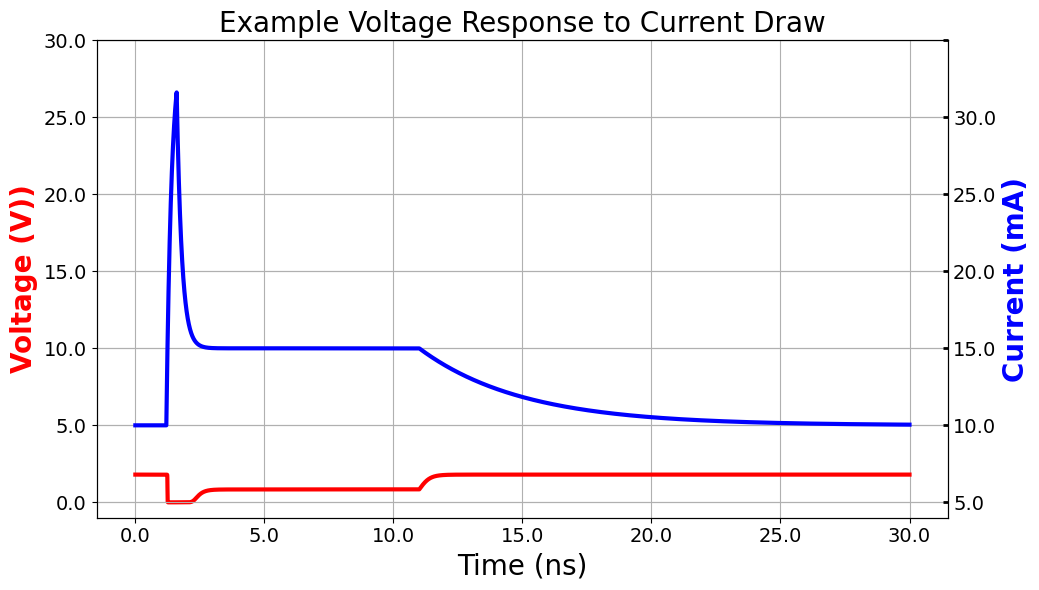

In [5]:
# rail span collapse example

V_nominal = 1.8
k = 4.1
V_limit = 0.01
I_limit = 8.7

I_0 = I_limit - (math.log(V_limit / (V_nominal - V_limit)) / k)

def rail_collapse(I):
    V = V_nominal / (1 + math.exp(-k * (I - I_0)))
    return V


t_r = 1.2e-9
t_f = 11e-9
tau_r = 0.2e-9
tau_f = 4e-9
I_peak = 10e-3
I_initial = 5e-3

t_r_2 = 1.2e-9
t_f_2 = 1.6e-9
tau_r_2 = 0.2e-9
tau_f_2 = 0.2e-9
I_peak_2 = 20e-3
I_initial_2 = 0

t_start = 0
t_stop = 30e-9
t_step = 1e-12

def double_exp_1(t):
    if (t < t_r):
        y = I_initial
    elif(t_r <= t < t_f):
        y = I_initial + (I_peak - I_initial) * (1 - math.exp((-1 * (t - t_r)) / tau_r))
    else:
        y = I_initial + (I_peak - I_initial) * (1 - math.exp((-1 * (t - t_r)) / tau_r)) - (I_peak - I_initial) * (1 - math.exp((-1 * (t - t_f)) / tau_f))

    return y



def double_exp_2(t):
    if (t < t_r_2):
        y = I_initial_2
    elif(t_r_2 <= t < t_f_2):
        y = I_initial_2 + (I_peak_2 - I_initial_2) * (1 - math.exp((-1 * (t - t_r_2)) / tau_r_2))
    else:
        y = I_initial_2 + (I_peak_2 - I_initial_2) * (1 - math.exp((-1 * (t - t_r_2)) / tau_r_2)) - (I_peak_2 - I_initial_2) * (1 - math.exp((-1 * (t - t_f_2)) / tau_f_2))

    return y


t_values = []
V_values = []
I_values = []

t = t_start
V = 0

while t <= t_stop:
    V = V_nominal - rail_collapse((double_exp_1(t) + double_exp_2(t)) * 1000)
    
    t_values.append(t * 1e9)
    V_values.append(V)
    I_values.append((double_exp_1(t) + double_exp_2(t)) * 1000)
    t += t_step

# plt.plot(t_values, V_values, color='indianred', linewidth=2)
# plt.plot(t_values, I_values, color='steelblue', linewidth=2)
# plt.xlabel('Time (ns)')
# plt.ylabel('Voltage Drop (V)')
# plt.title('Rail Span Collapse Function')
# plt.show()


fig, ax1 = plt.subplots()

ax1.plot(t_values, V_values, color='red', linewidth=3)
ax1.set_xlabel("Time (ns)", fontsize=20)
ax1.set_ylim(-1, 30)
ax1.set_ylabel("Voltage (V))", color='red', fontsize=20, fontweight='bold')
ax1.set_title('Example Voltage Response to Current Draw', fontsize=20)
ax1.set_yticklabels(ax1.get_yticks(), fontsize=12)
ax1.set_xticklabels(ax1.get_xticks(), fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)

ax2 = ax1.twinx()

ax2.plot(t_values, I_values, color='blue', linewidth=3)
ax2.set_ylabel("Current (mA)", color='blue', fontsize=20, fontweight='bold')
ax2.set_yticklabels(ax2.get_yticks(), fontsize=12)
ax2.set_ylim(-1, 30)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tick_params(direction='in', width='2')
plt.tight_layout()
plt.savefig("Rail_Collapse_Response")
plt.show()


[Warning] Variable data type is detected as double precision.


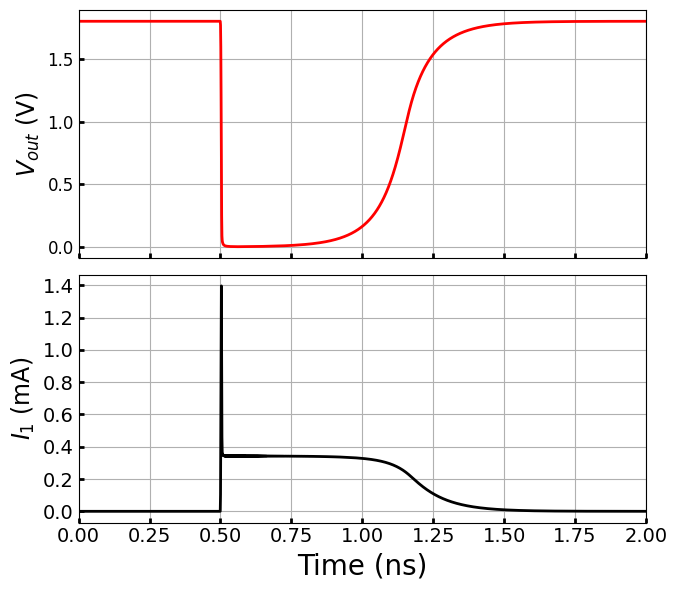

In [30]:
# plot inverter charge injection

import ltspice

plt.rcParams['figure.figsize'] = [7, 6]

l = ltspice.Ltspice('Inverter_Sim.raw')
l.parse()

time = 1e9 * l.get_time() - 1.5
v_out = l.get_data('v(out)')
i_in = -1e3 * l.get_data('I(@b.x1.b2[i])')

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(time, v_out, linewidth=2, color='red')
ax1.set_ylabel('$V_{out}$ (V)', fontsize=17)

ax1.tick_params(axis='x', labelbottom=False)
ax1.tick_params(axis='y', labelsize=12)
ax1.grid(True)
ax1.tick_params(direction='in', width='2')
ax1.set_xlim(0, 2)

ax2.plot(time, i_in, linewidth=2, color="black")
ax2.set_ylabel('$I_1$ (mA)', fontsize=17)
ax2.set_xlabel('Time (ns)', fontsize=20)
ax2.set_xlim(0, 2)
#ax2.set_xticklabels(ax2.get_xticks(),fontsize=12)
#ax2.set_yticklabels(ax2.get_yticks(), fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tick_params(direction='in', width='2')
plt.tight_layout()
plt.savefig("Inverter_Response")
plt.show()


In [7]:
# plot inverter charge injection

import ltspice


plt.rcParams['figure.figsize'] = [8, 6]

l = ltspice.Ltspice('sram.raw')
l.parse()

time = 1e9 * l.get_time()
v_q = l.get_data('v(Q)')
v_qn = l.get_data('v(QN)')
i_in = 1e3 * l.get_data('I(@b.x1.b1[i])')



fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(time, v_q, linewidth=2, color='red', label="Q")
ax1.set_ylabel('Voltage (V)', fontsize=17)
ax1.plot(time, v_qn, linewidth=2, color='blue', label="QN")
ax1.set_title('SRAM Radiation Response', fontsize=20)
ax1.legend(fontsize=15)

ax1.tick_params(axis='x', labelbottom=False)
ax1.tick_params(axis='y', labelsize=12)
ax1.grid(True)
ax1.tick_params(direction='in', width='2')

ax2.plot(time, i_in, linewidth=2, color="black")
ax2.set_ylabel('Current (mA)', fontsize=17)
ax2.set_xlabel('Time (ns)', fontsize=20)

#ax2.set_xticklabels(ax2.get_xticks(),fontsize=12)
#ax2.set_yticklabels(ax2.get_yticks(), fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tick_params(direction='in', width='2')
plt.tight_layout()
plt.savefig("SRAM_Response")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'sram.raw'

[Warning] Variable data type is detected as double precision.


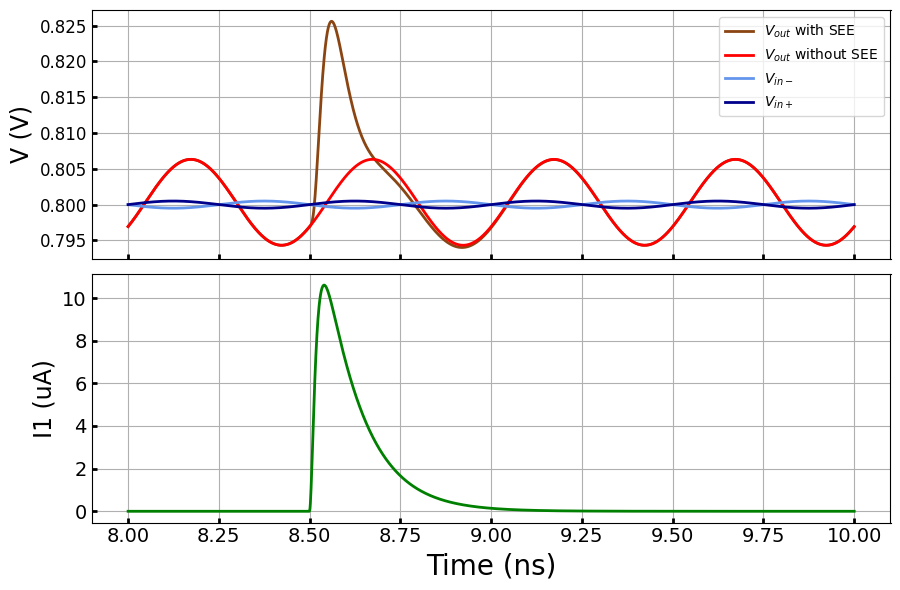

In [29]:
# plot op amp

import ltspice
import re
import os
from cycler import cycler

plt.rcParams['figure.figsize'] = [9, 6]
fig, (ax1, ax2) = plt.subplots(2, 1)

NUM_ITERATIONS = 20
#QtotN = 0.0221    #pC
QtotN = 0.08    #pC



l = ltspice.Ltspice('test_opamp.raw')
l.parse()

time = 1e9 * l.get_time()
v_out = l.get_data('v(v_out)')
v_out_0 = l.get_data('v(v_out_0)')
v_in_n = l.get_data('v(v_in-)')
v_in_p = l.get_data('v(v_in+)')
i_in = 1e6 * l.get_data('I(@b.x1.b1[i])')
i_in = i_in * -1


ax1.plot(time, v_out, linewidth=2, color='saddlebrown', label='$V_{out}$ with SEE')
ax1.plot(time, v_out_0, linewidth=2, color='red', label='$V_{out}$ without SEE')

ax1.set_ylabel('V (V)', fontsize=17)

ax1.tick_params(axis='x', labelbottom=False)
ax1.tick_params(axis='y', labelsize=12)
ax1.grid(True)

#ax1.set_ylim(1.075, 1.13)
ax1.tick_params(direction='in', width='2')
ax1.plot(time, v_in_n, linewidth=2, color='cornflowerblue', label='$V_{in-}$')
ax1.plot(time, v_in_p, linewidth=2, color='darkblue', label='$V_{in+}$')
ax1.legend()

ax2.tick_params(axis='y', labelsize=12)
ax2.tick_params(direction='in', width='2')
#ax2.tick_params(axis='x', labelbottom=False)
ax2.plot(time, i_in, linewidth=2, color='green')
ax2.set_ylabel('I1 (uA)', fontsize=17)
ax2.grid(True)




#ax3.set_ylim(1.05, 1.15)
#ax3.set_ylabel('v_in', fontsize=17)
#ax3.grid(True)
ax2.set_xlabel('Time (ns)', fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tick_params(direction='in', width='2')
plt.tight_layout()
plt.savefig("op_amp_sim")
plt.show()


0


Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

Using SPARSE 1.3 as Direct Linear Solver



Note: Compatibility modes selected: hs a


Circuit: ** sch_path: /home/collinml/xschem_schematics/sram.sch

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
binary raw file "sram.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 55  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
qn                                 9.70696e-08
q                                          1.8
vdd                                        1.8
x1.0_vmeas_0                                 0
x1.cap_v                                     0
v.x1.v_b1#branch                             0
v1#branch                         -3.26426e-10

 Reference value :  

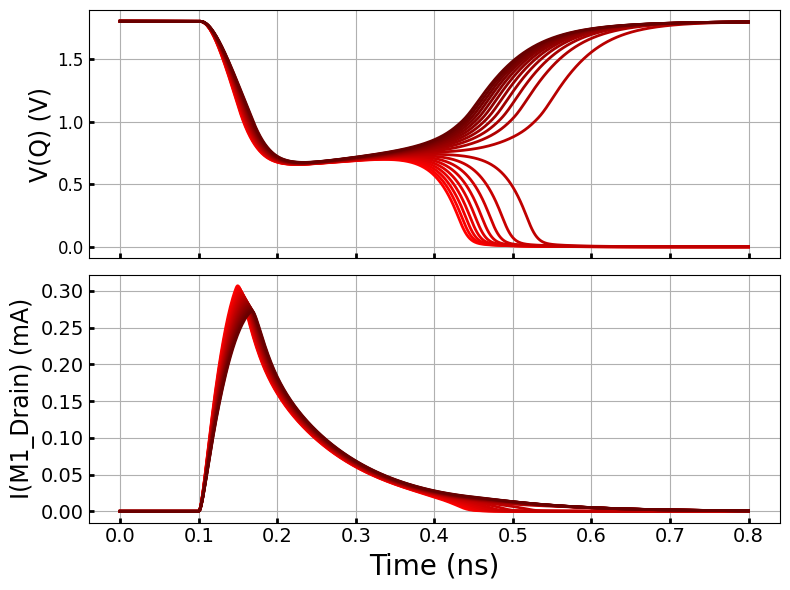

In [8]:
# plot inverter charge injection

import ltspice
import re
import os
from cycler import cycler

plt.rcParams['figure.figsize'] = [8, 6]
fig, (ax1, ax2) = plt.subplots(2, 1)


custom_cycler = (cycler(color=['#C03000', '#C06000', '#C09000', "#C0C000",
                               '#90C000', '#60C000', '#30C000', '#00C000',
                               '#00C030', '#00C060', '#00C090', '#00C0C0',
                               '#0090C0', '#0060C0', '#0030C0', '#0000C0',
                               '#3000C0', '#6000C0', '#9000C0', '#C000C0',
                               '#C00090', '#C00060', '#C00030', '#C000C0']))

custom_cycler2 = (cycler(color=['#C02000', '#C04000', '#C06000', "#C08000", "#C0A000", "#C0C000",
                               '#A0C000', '#80C000', '#60C000', '#40C000', '#20C000', '#00C000',
                               '#20C000', '#40C000', '#60C000', '#80C000', '#A0C000', '#C0C000',
                               "#C0A000", "#C08000", "#C06000", "#C04000", "#C02000", "#C00000"]))

custom_cycler3 = (cycler(color=['#00C000', '#00C020', '#00C040', '#00C080', '#00C0A0', '#00C0C0',
                                '#00A0C0', '#0080C0', '#0060C0', '#0040C0', '#0020C0', '#0000C0',
                                '#0020C0', '#0040C0', '#0060C0', '#0080C0', '#00A0C0', '#00C0C0',
                                '#00C0A0', '#00C080', '#00C060', '#00C040', '#00C020',]))

custom_cycler4 = (cycler(color=[
                                '#C0C000', '#A0C000', '#80C000', '#60C000', '#40C000', '#20C000',
                                '#00C000', '#00C020', '#00C040', '#00C080', '#00C0A0', '#00C0C0',
                                '#00A0C0', '#0080C0', '#0060C0', '#0040C0', '#0020C0', '#0000C0',
                                '#0020C0', '#0040C0', '#0060C0', '#0080C0', '#00A0C0', '#00C0C0',
                                '#00C0A0', '#00C080', '#00C060', '#00C040', '#00C020', '#00C000',
                                '#20C000', '#40C000', '#60C000', '#80C000', '#A0C000',]))

ax1.set_prop_cycle(custom_cycler_red_fine)
ax2.set_prop_cycle(custom_cycler_red_fine)

NUM_ITERATIONS = 20
#QtotN = 0.0221    #pC
QtotN = 0.08    #pC

for i in range(NUM_ITERATIONS):
    print(i)
    t1 = 0.5
    t2 = i
    t2_minus_t1 = t2 - t1
    tau1 = 2
    tau2 = 10

    search_text = "x1 Q GND adaptive_double_exp .* k=1e11 recomb_param=1"
    replace_text = "x1 Q GND adaptive_double_exp t_r=0.1n tau_r=100p t_f={}n tau_f=100p q_tot={}p k=1e11 recomb_param=1".format((0.148 + (t2 * 10**-3)), QtotN)
    
    with open('sram.spice', 'r') as file: 
        data = file.read() 
        data = re.sub(search_text, replace_text, data)
        file.close()
    

    with open('sram.spice', 'w') as file: 
        file.write(data) 
        file.close()

    bash_command = "ngspice -b -r sram.raw /home/collinml/RAD-HARD/Archive/image_gen/sram.spice"
    os.system(bash_command)


    l = ltspice.Ltspice('sram.raw')
    l.parse()

    time = 1e9 * l.get_time()
    v_q = l.get_data('v(Q)')
    v_qn = l.get_data('v(QN)')
    i_in = 1e3 * l.get_data('I(@b.x1.b1[i])')

    #ax1.plot(time, v_q, linewidth=2, color='red', label="Q")
    #ax1.plot(time, v_q, linewidth=2, color=((1 - (i * 0.2)), 0, 0))
    #ax1.plot(time, v_q, linewidth=2)
    #q_color = 0xA00000 + (0x002000 * i)
    #hex_string = "{:06x}".format(q_color)
    #ax1.plot(time, v_q, linewidth=2, color="#{}".format(hex_string[-6:]))
    ax1.plot(time, v_q, linewidth=2)
    ax1.set_ylabel('V(Q) (V)', fontsize=17)
    #ax1.plot(time, v_qn, linewidth=2, color='blue', label="QN")
    #ax1.set_title('SRAM Radiation Response', fontsize=20)
    #ax1.legend(fontsize=15)

    ax1.tick_params(axis='x', labelbottom=False)
    ax1.tick_params(axis='y', labelsize=12)
    ax1.grid(True)
    ax1.tick_params(direction='in', width='2')

    #ax2.plot(time, i_in, linewidth=2)
    #ax2.plot(time, i_in, linewidth=2, color="#{}".format(hex_string[-6:]))
    ax2.plot(time, i_in, linewidth=2)
    ax2.set_ylabel('I(M1_Drain) (mA)', fontsize=17)
    ax2.set_xlabel('Time (ns)', fontsize=20)

#ax2.set_xticklabels(ax2.get_xticks(),fontsize=12)
#ax2.set_yticklabels(ax2.get_yticks(), fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tick_params(direction='in', width='2')
plt.tight_layout()
plt.savefig("SRAM_Response_Multi")
plt.show()


[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning] Variable data type is detected as double precision.
[Warning

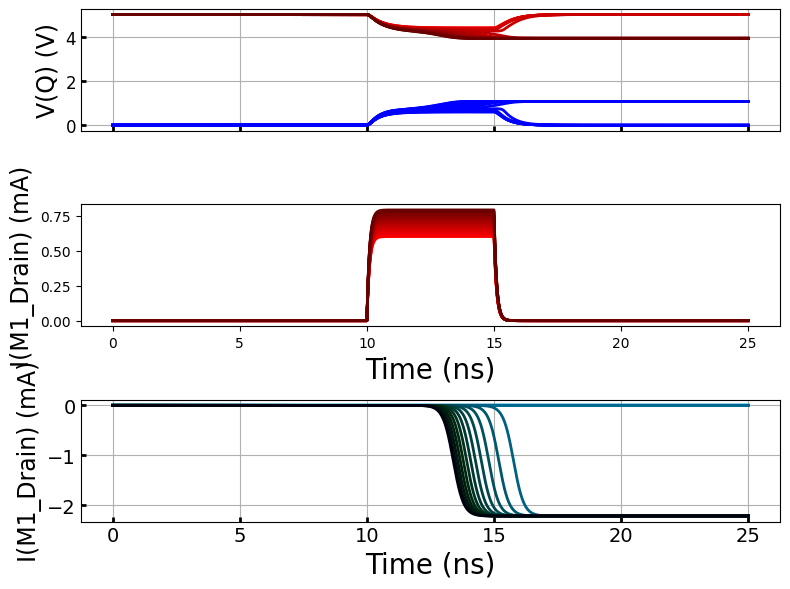

In [29]:
# plot SEL basic

import ltspice
import re
import os
from cycler import cycler
import re
import warnings
warnings.filterwarnings("ignore")


plt.rcParams['figure.figsize'] = [8, 6]
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)


custom_cycler = (cycler(color=['#C03000', '#C06000', '#C09000', "#C0C000",
                               '#90C000', '#60C000', '#30C000', '#00C000',
                               '#00C030', '#00C060', '#00C090', '#00C0C0',
                               '#0090C0', '#0060C0', '#0030C0', '#0000C0',
                               '#3000C0', '#6000C0', '#9000C0', '#C000C0',
                               '#C00090', '#C00060', '#C00030', '#C000C0']))

custom_cycler2 = (cycler(color=['#C02000', '#C04000', '#C06000', "#C08000", "#C0A000", "#C0C000",
                               '#A0C000', '#80C000', '#60C000', '#40C000', '#20C000', '#00C000',
                               '#20C000', '#40C000', '#60C000', '#80C000', '#A0C000', '#C0C000',
                               "#C0A000", "#C08000", "#C06000", "#C04000", "#C02000", "#C00000"]))

custom_cycler3 = (cycler(color=['#00C000', '#00C020', '#00C040', '#00C080', '#00C0A0', '#00C0C0',
                                '#00A0C0', '#0080C0', '#0060C0', '#0040C0', '#0020C0', '#0000C0',
                                '#0020C0', '#0040C0', '#0060C0', '#0080C0', '#00A0C0', '#00C0C0',
                                '#00C0A0', '#00C080', '#00C060', '#00C040', '#00C020',]))

custom_cycler4 = (cycler(color=[
                                '#C0C000', '#A0C000', '#80C000', '#60C000', '#40C000', '#20C000',
                                '#00C000', '#00C020', '#00C040', '#00C080', '#00C0A0', '#00C0C0',
                                '#00A0C0', '#0080C0', '#0060C0', '#0040C0', '#0020C0', '#0000C0',
                                '#0020C0', '#0040C0', '#0060C0', '#0080C0', '#00A0C0', '#00C0C0',
                                '#00C0A0', '#00C080', '#00C060', '#00C040', '#00C020', '#00C000',
                                '#20C000', '#40C000', '#60C000', '#80C000', '#A0C000',]))

ax1.set_prop_cycle(custom_cycler_red_fine)
ax2.set_prop_cycle(custom_cycler_red_fine)

NUM_ITERATIONS = 20
#QtotN = 0.0221    #pC
Qtot = 3    #pC

for i in range(NUM_ITERATIONS):

    search_text = r"x3 net1 net2 double_exp t_r=10n tau_r=100p t_f=15n tau_f=100p q_tot=[^ ]*p"
    replace_text = "x3 net1 net2 double_exp t_r=10n tau_r=100p t_f=15n tau_f=100p q_tot={}p".format(Qtot + i * 0.05)
    
    with open('SEL_BASIC.spice', 'r') as file: 
        data = file.read() 
        data = re.sub(search_text, replace_text, data)
        file.close()
    

    with open('SEL_BASIC.spice', 'w') as file: 
        file.write(data) 
        file.close()

    bash_command = "ngspice -b -r SEL_BASIC.raw /home/collinml/OSCRE/Archive/image_gen/SEL_BASIC.spice > /dev/null 2>&1"
    os.system(bash_command)


    l = ltspice.Ltspice('SEL_BASIC.raw')
    l.parse()

    time = 1e9 * l.get_time()
    v_q = l.get_data('v(net1)')
    v_qn = l.get_data('v(net2)')
    i_in = 1e3 * l.get_data('I(@i.x3.i1[current])')
    i_vdd = l.get_data('i(v1)')



    #ax1.plot(time, v_q, linewidth=2, color='red', label="Q")
    #ax1.plot(time, v_q, linewidth=2, color=((1 - (i * 0.2)), 0, 0))
    #ax1.plot(time, v_q, linewidth=2)
    #q_color = 0xA00000 + (0x002000 * i)
    #hex_string = "{:06x}".format(q_color)
    #ax1.plot(time, v_q, linewidth=2, color="#{}".format(hex_string[-6:]))
    ax1.plot(time, v_q, linewidth=2)
    ax1.set_ylabel('V(Q) (V)', fontsize=17)
    ax1.plot(time, v_qn, linewidth=2, color='blue', label="QN")
    #ax1.set_title('SRAM Radiation Response', fontsize=20)
    #ax1.legend(fontsize=15)

    ax1.tick_params(axis='x', labelbottom=False)
    ax1.tick_params(axis='y', labelsize=12)
    ax1.grid(True)
    ax1.tick_params(direction='in', width='2')

    #ax2.plot(time, i_in, linewidth=2)
    #ax2.plot(time, i_in, linewidth=2, color="#{}".format(hex_string[-6:]))
    ax2.plot(time, i_in, linewidth=2)
    ax2.set_ylabel('I(M1_Drain) (mA)', fontsize=17)
    ax2.set_xlabel('Time (ns)', fontsize=20)

    ax3.plot(time, i_vdd, linewidth=2)
    ax3.set_ylabel('I(M1_Drain) (mA)', fontsize=17)
    ax3.set_xlabel('Time (ns)', fontsize=20)

#ax2.set_xticklabels(ax2.get_xticks(),fontsize=12)
#ax2.set_yticklabels(ax2.get_yticks(), fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tick_params(direction='in', width='2')
plt.tight_layout()
plt.savefig("SRAM_Response_Multi")
plt.show()
